In [9]:
# Description: CogSci paper analysis for Experiment 1

# Load libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Load data
trials_PEC_path = '../outputs/all_trials_with_Ri.csv'
trials_PEC = pd.read_csv(trials_PEC_path)

# select only Experiment 1 data
trials_PEC = trials_PEC[trials_PEC['learning_condition'] == 'Experiment 1 (no preview)']

# aggregate accuracy data for each participant and each trial type response_correct and response_correct_mm
aggregated_accuracy = trials_PEC.groupby(['participant_id', 'learning_condition', 'fsm_type', 'test_condition', 'trial_type'])['response_correct', 'response_correct_mm'].mean().reset_index()

# create trials_PEC_long dataframe
trials_PEC_long = pd.melt(aggregated_accuracy, id_vars=['participant_id', 'learning_condition', 'fsm_type', 'test_condition', 'trial_type'],
                            value_vars=['response_correct', 'response_correct_mm'], var_name='accuracy_type', value_name='accuracy')

# aggregate accuracy data for each participant and each trial type
aggregated_accuracy = trials_PEC_long 

/var/folders/l7/9hgxx_dj03s7tlk60qhh11yc0000gn/T/ipykernel_14524/400885782.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aggregated_accuracy = trials_PEC.groupby(['participant_id', 'learning_condition', 'fsm_type', 'test_condition', 'trial_type'])['response_correct', 'response_correct_mm'].mean().reset_index()


Text(0.5, 1.0, '')

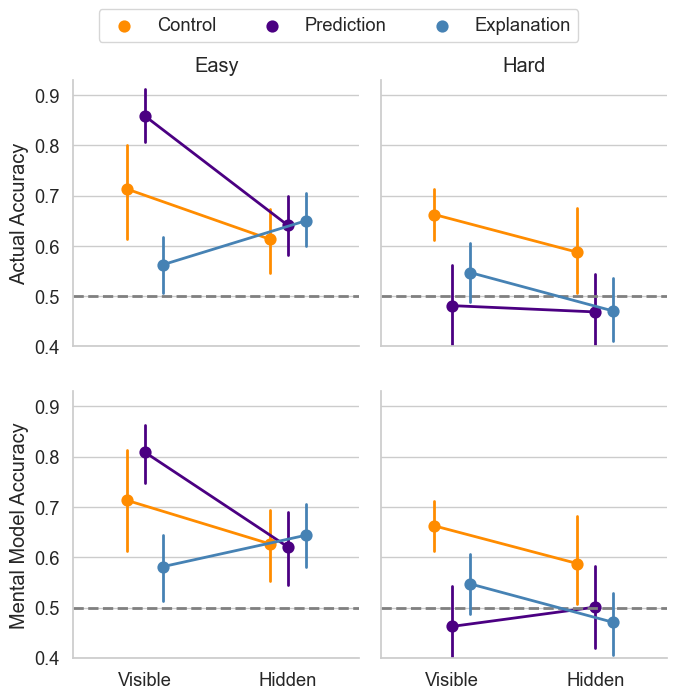

In [14]:
# rename easy to Easy and hard to Hard
aggregated_accuracy['fsm_type'] = aggregated_accuracy['fsm_type'].replace({'easy': 'Easy', 'hard': 'Hard'})

# rename test_condition 
aggregated_accuracy['test_condition'] = aggregated_accuracy['test_condition'].replace({'prediction': 'Prediction', 'control': 'Control', 'explanation': 'Explanation'})
aggregated_accuracy['trial_type'] = aggregated_accuracy['trial_type'].replace({'visible': 'Visible', 'hidden': 'Hidden'})

# convert trial_type and fsm_type to categorical variable with ordered levels
aggregated_accuracy['trial_type'] = pd.Categorical(aggregated_accuracy['trial_type'], categories=['Visible', 'Hidden'], ordered=True)
aggregated_accuracy['fsm_type'] = pd.Categorical(aggregated_accuracy['fsm_type'], categories=['Easy', 'Hard'], ordered=True)

# Plot mean accuracy and 95%CI
sns.set(style="whitegrid", font_scale=1.2) # set style and font size for all plots

g = sns.catplot(x="trial_type", y="accuracy", hue="test_condition", col="fsm_type", row="accuracy_type", data=aggregated_accuracy,
                kind="point", dodge=0.25, join=True, errorbar = ("ci", 95), palette=['darkorange','indigo','steelblue'],
                height=3.5, aspect=1, legend=False) # set legend to False

# make line thiner
for ax in g.axes.flat:
    ax.set_ylim(0.4, 0.93)
    ax.axhline(0.5, ls='--', color='gray')
    for line in ax.lines:
        line.set_linewidth(2)
    
# add different y-axis labels for each row (Actual vs. Mental Model)
g.axes[0,0].set_ylabel("Actual Accuracy")
g.axes[1,0].set_ylabel("Mental Model Accuracy")

# remove x-axis label
g.set_xlabels("")

# add legend to the top center outside of the plot and in 3 rows
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

# add col names to the top of each column
g.axes[0,0].set_title("Easy")
g.axes[0,1].set_title("Hard")
g.axes[1,0].set_title("")
g.axes[1,1].set_title("")